## Working with Multiple Input Linear Models to Make Predictions
In this case study I will use two inputs and linear model features to interpret the results of predictions. 

The data used will be randomly generated  and fitted using the `statsmodels` interface to fit linear regression. I will interpret the results via the coefficient summaries and use specialized `statsmodels` graphics to extract insights into the behavior of the predictions. Let's get started by importing the required Python modules.


## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

## Set Regression Coefficients for Linear Additive Features
I will work with two inputs x1 and x2. These inputs will be used as additive features to model the relationships between each input and the average output, the `trend`. However, this model can be scaled to MANY inputs as applicable in real-world data. 

To generate the data we must specify the regression coefficients. Note you can use any value. For this case study, I will use  `b0 = -0.25`, `b1 = 1.95`, `b2 = 0.2`, where b is the unstandardized beta value representing the slope of the line between the predictor variable and the dependent variable.  

In [2]:
# assign the additive features
b0 = -0.25
b1 = 1.95
b2 = 0.2

## Generate Random Input Data
Assuming that the inputs have standard normal distributions with the `Mean = 0`, and the `Standard Deviation = 1`. Hence I will use a relatively small sample size (number of observations) of 35 data points and then generate a random number with a reproducible seed.

In [3]:
# Set the number of observations
N = 35

In [4]:
# Initialize random number generator and assign it to rg object
# Then Set the seed of 2100 for reproducibility
rg = np.random.default_rng(2100)

In [5]:
# Call the NumPy random number generator for 2 input 
# The loc (Mean), Scale(Std), Size(Number of observations) 
x1 = rg.normal(loc=0, scale=1, size = N)
x2 = rg.normal(loc=0, scale=1, size = N)

In [6]:
# Assign the inputs to the data frame using a dictionary
df_input = pd.DataFrame({'x1': x1, 'x2': x2})

In [7]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      35 non-null     float64
 1   x2      35 non-null     float64
dtypes: float64(2)
memory usage: 692.0 bytes


In [8]:
df_input.head()

,x1,x2
0,1.024252,-0.650623
1,-1.733671,0.993904
2,-0.089294,0.251805
3,-1.093748,1.356543
4,0.320995,-0.145121


### Calculate the TREND (Avg Output) assuming the LINEAR ADDITIVE FEATURES
To calculate the average output or trend of the linear model I will use the linear model formula for continuous input that is linearly related to the TREND given the generated `input x1` and `input x2` and the 3 regression coefficients  `b0 = -0.25`, `b1 = 1.95`, `b2 = 0.2`. 

$$\mu = \beta_0 + \beta_1 \times x1 + \beta_2 \times x2 $$

This formula will allow us to add the effects (product) of the `input x1` to `input x2` for the output.



In [9]:
# Make a hard copy of the df_input and assign it to df
df = df_input.copy()

I will store the trend given the additive INPUTS values in a calculated column `trend`.  

In [10]:
# Calculate the output and assign to a column [trend]
df['trend'] = b0 + b1 * df['x1'] + b2 * df['x2']
df.head()

,x1,x2,trend
0,1.024252,-0.650623,1.617167
1,-1.733671,0.993904,-3.431878
2,-0.089294,0.251805,-0.373762
3,-1.093748,1.356543,-2.111500
4,0.320995,-0.145121,0.346917


Note! that the regression linear model assumes that the output is normally distributed around its average, so the Gaussian distribution needs a standard deviation (sigma). As such I will set a sigma value and then will call one more Gaussian random number generator and set the `residual error` or remaining variation around the trend for the random output `y`. 

In [11]:
# Set sigma
g_sigma = 0.85

In [12]:
# Generate random output Y using the avg output (trend) as mean, Scale(g_sigma), size will be the df sample size
df['y'] = rg.normal(loc=df.trend, scale=g_sigma, size=df.shape[0])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      35 non-null     float64
 1   x2      35 non-null     float64
 2   trend   35 non-null     float64
 3   y       35 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


In [14]:
df.head()

,x1,x2,trend,y
0,1.024252,-0.650623,1.617167,1.547730
1,-1.733671,0.993904,-3.431878,-3.988479
2,-0.089294,0.251805,-0.373762,-0.107839
3,-1.093748,1.356543,-2.111500,-2.594083
4,0.320995,-0.145121,0.346917,-0.583119


Now that we have our modeled dataset let's visualize the relationship between the inputs x1, x2, and output.

## Visualize the Relationships (Inputs and Output)
Let's start with the relationship between input `x1` and output `y`. I will not use a line chart for this visualization because we are working with a randomly generated output that has unexplainable variation.

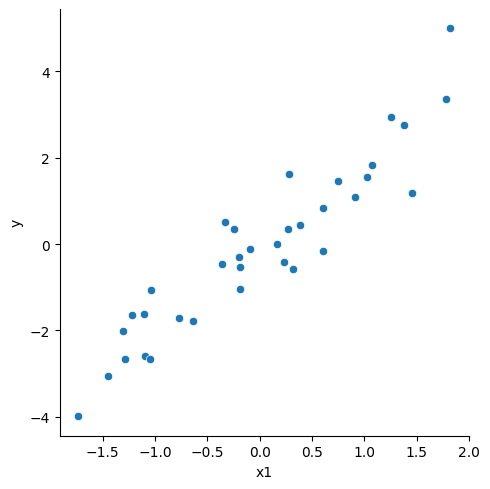

In [15]:
# Examine the relationship between x1 and y
sns.relplot(data = df, x='x1', y ='y', kind='scatter' )
plt.show()

The output `y` appears to be increasing as input `x1` increases. This indicates a positive relationship between the two.

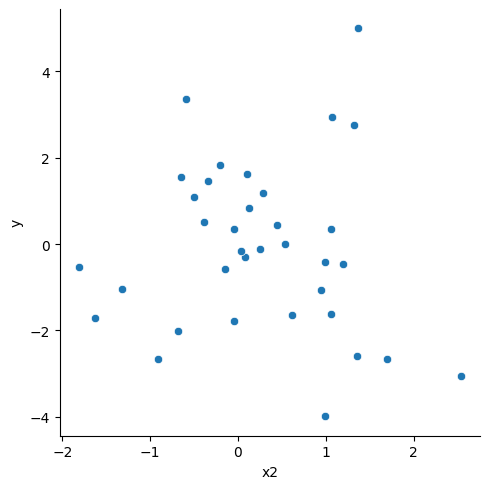

In [16]:
# Examine the relationship between x1 and y
sns.relplot(data = df, x='x2', y ='y', kind='scatter' )
plt.show()

There is no definitive relationship between `x2` and `y`, so there is no relationship between the second input and the output. Next, I will include a best fit line (trend line or regression line) to help further identify possible trends between the output and the inputs.

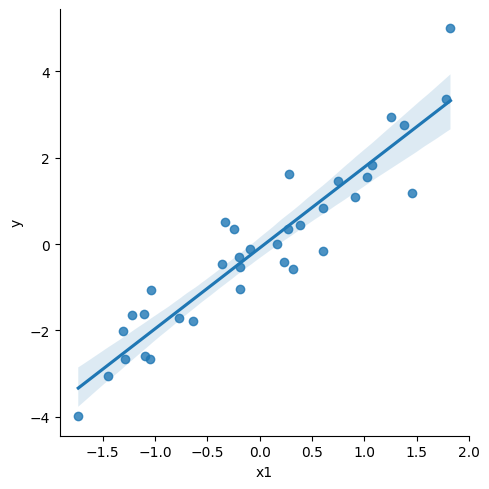

In [17]:
sns.lmplot(data=df, x='x1', y='y')
plt.show()

The regression line shown here assumes a linear relationship between the average output and the input x1. There seem to be a positive relationship between the input and output because of how narrow the confidence interval (CI) is. The CI here represents the uncertainty of the output and when the CI do not overlap that mean we are confident that the average output is different between the low median and high inputs. WHich mean that the average output is increasing as the input is increasing.

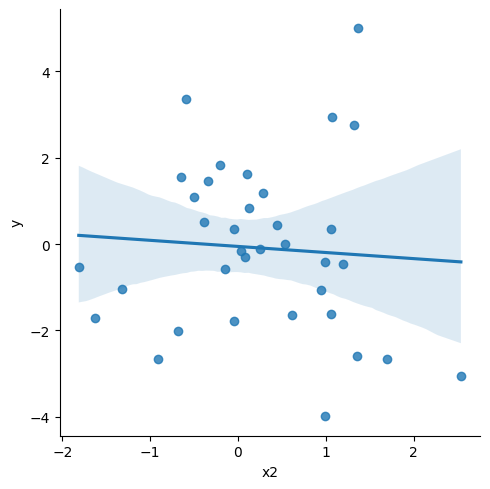

In [18]:
# Examin the secong input
sns.lmplot(data=df, x='x2', y='y')
plt.show()

For the second input x2 we can see that the CI is overlapping, therefore it is difficult to determine that the average output is changing as the input x2 is changing. Also, the best-fit line has a negative slope showing that as the input `x2` increases the output `y` decreases. 

### Fit the Models and Summarize to Confirm the Visualization
Let's start with the relationship between input x1 and output.

In [19]:
# Fit a linear model btw the trend and x1 
x1_fit = smf.ols(data = df, formula='y ~ x1').fit()

In [20]:
# Show the estimates
x1_fit.params

Intercept   -0.090893
x1           1.871110
dtype: float64

From the estimates, the slope multiplying x1 is positive `1.9`

In [21]:
# show the standard error
x1_fit.bse

Intercept    0.120418
x1           0.124351
dtype: float64

The standard error is consistent

In [22]:
# show the pvalues
x1_fit.pvalues

Intercept    4.557120e-01
x1           2.465001e-16
dtype: float64

In [23]:
x1_fit.pvalues < 0.05

Intercept    False
x1            True
dtype: bool

The pvalue is small and is less than the common conventional 0.05 significance. Therefore x1 is a statistically significant positive slope.

In [24]:
# Examine the 95% CI bounds
x1_fit.conf_int().rename(columns={0: 'ci_lower', 1: 'ci_upper'})

,ci_lower,ci_upper
Intercept,-0.335885,0.154098
x1,1.618115,2.124105


The 95% confidence interval lower and upper bounds are both positive. So again we are confident that the relationship between input `x1` and the trend `y` is a positive relationship. 

Let's now verify the relationship between input x2 and the output. 

In [25]:
x2_fit = smf.ols(data=df, formula='y ~ x2').fit()

In [26]:
# Check the slope coefficient estimates given the data
x2_fit.params

Intercept   -0.055393
x2          -0.141163
dtype: float64

The slope on input x2 is negative

In [27]:
# CHeck the standard error 
x2_fit.bse

Intercept    0.348395
x2           0.354524
dtype: float64

Standard error is consistent

In [28]:
# Check the pvalues
x2_fit.pvalues

Intercept    0.874641
x2           0.693066
dtype: float64

In [29]:
x2_fit.pvalues < 0.05

Intercept    False
x2           False
dtype: bool

The pvalue is not less than 0.05, hence it is not statistically significant

In [30]:
# Look at the confidence interval
x2_fit.conf_int().rename(columns={0: 'ci_lower', 1: 'ci_upper'})

,ci_lower,ci_upper
Intercept,-0.764209,0.653422
x2,-0.862448,0.580123


The confidence interval does not have the same sign the lower bound is negative and the upper bound is positive. Therefore we are not confident that the slope is definitely negative and thus not statistically significant. To examine this further, let's visualize the coefficient summaries using the approximation where the 95% CI is approximately 2 times the standard error. This ensures that our model works as intended even as we increase the standard error.

## Visualize the Coefficient Summaries

In [31]:
# Define a function to show the coefficient summaries and error bar

def coeff_summary(model, figsize_used=(10, 4)):
    fig, ax = plt.subplots(figsize = figsize_used)

    ax.errorbar(y=model.params.index, x=model.params, xerr = 2 * model.bse, fmt='v', color='b', linewidth=2, ms=10)

    ax.axvline(x=0, linestyle='--', linewidth=2.5, color='r')

    ax.set_xlabel('Coefficient Value')

    plt.show()
        

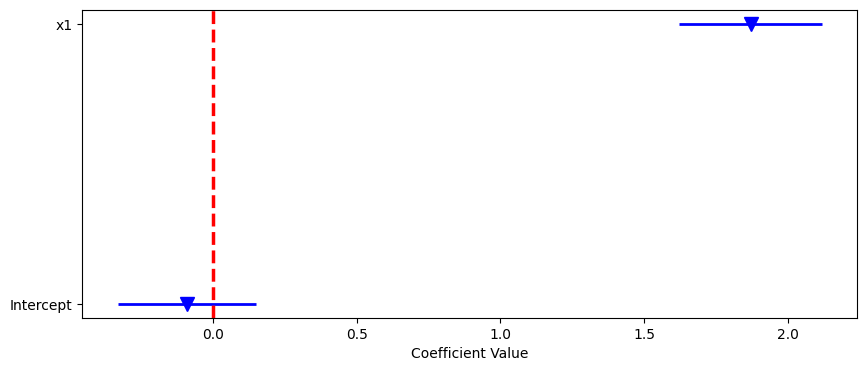

In [32]:
# Call the coefficient summary function given the input x1
coeff_summary(x1_fit)

Looking at x1 you can see that the 95% CI does not contain 0 it is at approx 1.9. I can say that this is a statistically significant positive relationship. Let's call the function passing in input x2.

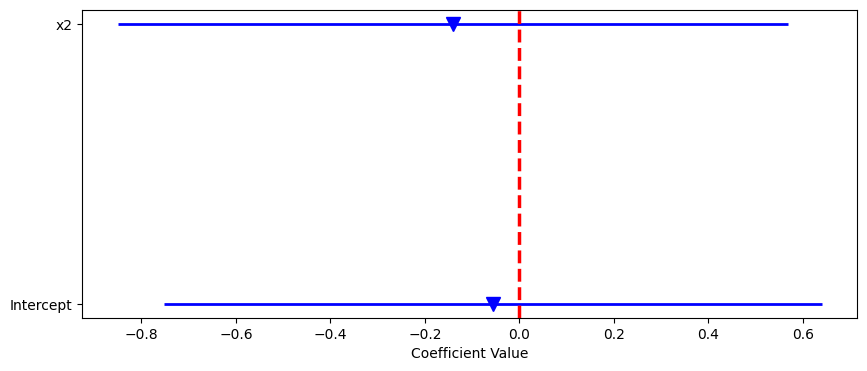

In [33]:
# Call the coefficient summary function given the input x2
coeff_summary(x2_fit)

Here you can see that the x2 in negative confirming that the 95% CI is not a statistically significant relationship. 

With that let's fit the features for both inputs

## Linear Additive Features with Multiple inputs

In [34]:
# Fit both inputs x1 and x2 and assign to an object
x1x2_fit_add = smf.ols(data=df, formula='y ~ x1 + x2').fit() # Adding the effects of the inputs together

In [35]:
# Check the estimates
x1x2_fit_add.params

Intercept   -0.109888
x1           1.879500
x2           0.075586
dtype: float64

Now you can see that the `x2` slope is changed from a negative to a positive value because we have added the magnitude and effects of the model to the features. This illustrates that just because you fit a single input and have a negative slope doesn't mean that it is negative. However when you add the additives to the feature that negative slope can change. Because now the inputs are estimated together not separately. So if you have several features in your dataset, you cannot only fit your model for one input and conclude that it is negative you have to account for all the inputs.

In [36]:
# Check the standard error
x1x2_fit_add.bse

Intercept    0.125869
x1           0.126418
x2           0.128857
dtype: float64

In [37]:
# check the pvalues
x1x2_fit_add.pvalues

Intercept    3.891495e-01
x1           6.381066e-16
x2           5.615963e-01
dtype: float64

In [38]:
x1x2_fit_add.pvalues < 0.05

Intercept    False
x1            True
x2           False
dtype: bool

Here only the x1 p-value is statistically significant even though the value of the x2 slope multiplying the x2 estimates is now positive. 

In [39]:
# Check the confidence interval of both inputs
x1x2_fit_add.conf_int().rename(columns={0:'ci_lower', 1: 'ci_upper' })

,ci_lower,ci_upper
Intercept,-0.366275,0.146499
x1,1.621996,2.137004
x2,-0.186887,0.338058


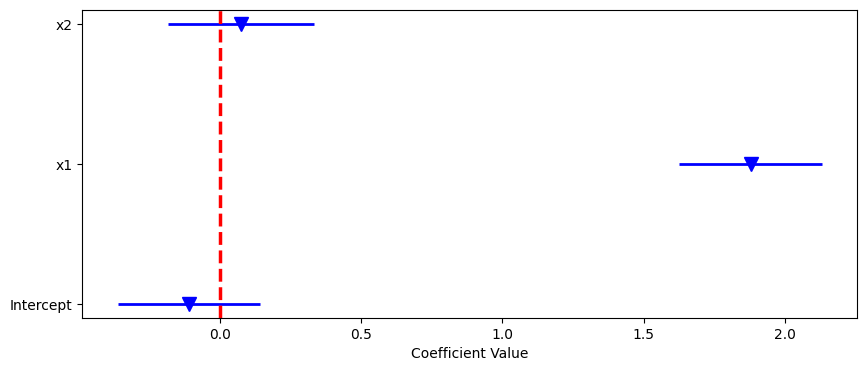

In [40]:
coeff_summary(x1x2_fit_add)

We still have a negative slope on x2 which tells us that we are not 100% confident in that slope. As such it is tough to be able to identify the slope given the size of the data we have. However input x1 has the largest magnitude which makes it the most important input that we can use to make predictions.  

Let's now make predictions.

## Making Predictions
Predictions involving multiple inputs require data frames that have all inputs used to fit the model. It is important to visualize the relationship between the output and the most important input. But how can you determine which input is the most important? When your inputs have the same magnitude and scale that is to say they are standardized. By construction of our inputs, they are because they both have `b0 = -0.25`, `b1 = 1.95`, `b2 = 0.2`. After fitting the input with the most magnitude and scale it eh most important input. Because the slope indicates how much the average output change for a one unit change of the input.

In [41]:
# Let's sort the input absolute value according to th order of magnitude
np.abs(x1x2_fit_add.params).sort_values(ascending=False)

x1           1.879500
Intercept    0.109888
x2           0.075586
dtype: float64

Hence, input `x1` is the most important input that can be used for predictions. 

Now create a training set dataframe for amy values of x1 for a single value of x2

### Create a training set for x1

In [42]:
# Create many values of x1 for 1 value of x2 into a df
df_predict_viz = pd.DataFrame({'x1': np.linspace(df.x1.min()-0.02, df.x1.max()+0.02, num=251)})
df_predict_viz

,x1
0,-1.753671
1,-1.739287
2,-1.724903
3,-1.710519
4,-1.696135
...,...
246,1.784818
247,1.799202
248,1.813586
249,1.827970


In [43]:
# Add in x2 at a single constant value
df_predict_viz['x2'] = df.x2.mean() # this is the mean of the training set 
df_predict_viz

,x1,x2
0,-1.753671,0.251296
1,-1.739287,0.251296
2,-1.724903,0.251296
3,-1.710519,0.251296
4,-1.696135,0.251296
...,...,...
246,1.784818,0.251296
247,1.799202,0.251296
248,1.813586,0.251296
249,1.827970,0.251296


The trianing set bounds of the most important input and the mean of the rest of the input are used to define the prediction grid. 

When we make a prediction we want to include columns,
- the trend (Average output),
- the uncertainty on the trend (Confidence Interval)
- the uncertainty of the single measurment (Prediction Interval)

In [44]:
# Prediction Step 1 - make a prediction using the training set for input x1 and x2
prediction_1 = x1x2_fit_add.get_prediction(df_predict_viz)

In [45]:
# Prediction Step 2 - generate prediction set summary
prediction_x1x2_summary = prediction_1.summary_frame()

In [46]:
# View prediction summary
prediction_x1x2_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-3.386918,0.252871,-3.902000,-2.871836,-4.940541,-1.833295
1,-3.359883,0.251279,-3.871721,-2.848045,-4.912434,-1.807333
2,-3.332848,0.249689,-3.841448,-2.824248,-4.884335,-1.781362
3,-3.305814,0.248103,-3.811182,-2.800445,-4.856243,-1.755384
4,-3.278779,0.246519,-3.780922,-2.776635,-4.828160,-1.729397
...,...,...,...,...,...,...
246,3.263671,0.256327,2.741550,3.785793,1.707700,4.819642
247,3.290706,0.257929,2.765321,3.816091,1.733637,4.847775
248,3.317741,0.259534,2.789087,3.846395,1.759566,4.875916
249,3.344776,0.261142,2.812847,3.876705,1.785487,4.904065


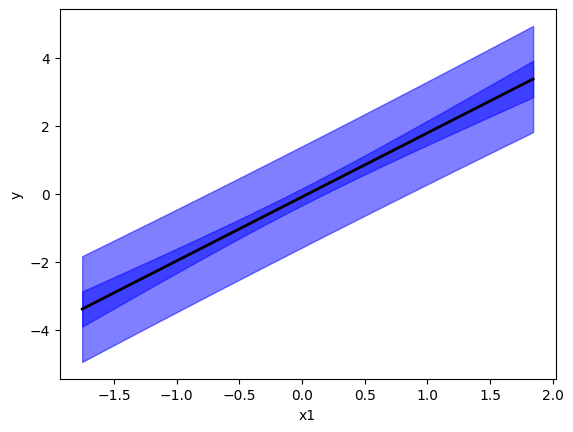

In [47]:
# Visualize the prediction using ribbons
fig, ax = plt.subplots()

# prediction interval PI
ax.fill_between(df_predict_viz.x1,  prediction_x1x2_summary.obs_ci_lower, prediction_x1x2_summary.obs_ci_upper,
               facecolor='blue', edgecolor='blue', alpha=0.5)

# Confidence Interval
ax.fill_between(df_predict_viz.x1,  prediction_x1x2_summary.mean_ci_lower, prediction_x1x2_summary.mean_ci_upper,
               facecolor='blue', edgecolor='blue', alpha=0.5)

# Trend line
ax.plot(df_predict_viz.x1, prediction_x1x2_summary['mean'], color='k', lw=2)

# Set labels
ax.set_xlabel('x1')
ax.set_ylabel('y')

# Show plot
plt.show()


This PI chart is focused on the relationship between the prediction and the most important input `x1`. However, to examine the influence of other inputs we need to allow the `x2` input to also change. Hence the visualization df must allow for multiple combinations of continuous input so that we can see the whole relationship. The idea is to have an output for every input. For this we will need to create a grid of input combinations that are evenly spread, iterating in a sequence across x1 and x2 columns from the minimum to the maximum values of each input. Then assign this to a data frame and visualize. 

In [48]:
# Create an input grid dataframe using a for loop 
x1x2_input_grid = pd.DataFrame([(x1, x2)
                          for x1 in np.linspace(df['x1'].min(), df['x1'].max(), num=101)
                          for x2 in np.linspace(df['x2'].min(), df['x2'].max(), num=9)],columns=['x1', 'x2'])


In [49]:
# Preview the dataframe
x1x2_input_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      909 non-null    float64
 1   x2      909 non-null    float64
dtypes: float64(2)
memory usage: 14.3 KB


In [50]:
x1x2_input_grid.nunique()

x1    101
x2      9
dtype: int64

So now we have evenly spaced data for both x1 and x2 inputs with x1 having 101 unique values and x2 nine. So that we can visualize the relationship between the most important input `x1` which we model to be statisticaaly significant and `x2` which wasn't. Now let's visualize this. 

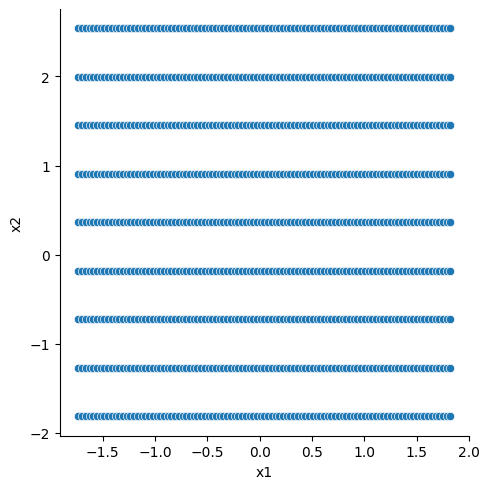

In [51]:
sns.relplot(data=x1x2_input_grid, x='x1', y='x2', kind='scatter')
plt.show()

There are 101 more unique values of the x1 than the x2 that's why you see the dots here.  Now let's predict using the `input grid` but only returning the predicted trend (output). Why? Because dealing with multiple inputs in a prediction like this is very challenging to return the uncertainty. In my next case study, I will work with multiple input and output.  

In [52]:
# Make a df hard copy and 
pred_grid_viz =  x1x2_input_grid.copy()


In [53]:
# With the additive input fitted model use the .predict() to predict the trend and assign the output to a column 
pred_grid_viz['pred_trend'] = x1x2_fit_add.predict( pred_grid_viz )

In [54]:
pred_grid_viz

,x1,x2,pred_trend
0,-1.733671,-1.813330,-3.505384
1,-1.733671,-1.269344,-3.464267
2,-1.733671,-0.725357,-3.423149
3,-1.733671,-0.181371,-3.382032
4,-1.733671,0.362615,-3.340914
...,...,...,...
904,1.822354,0.362615,3.342635
905,1.822354,0.906601,3.383753
906,1.822354,1.450587,3.424870
907,1.822354,1.994573,3.465988


Now let's visualize the relationship using line colors to show how the prediction for the trend changes across input x2 across x1

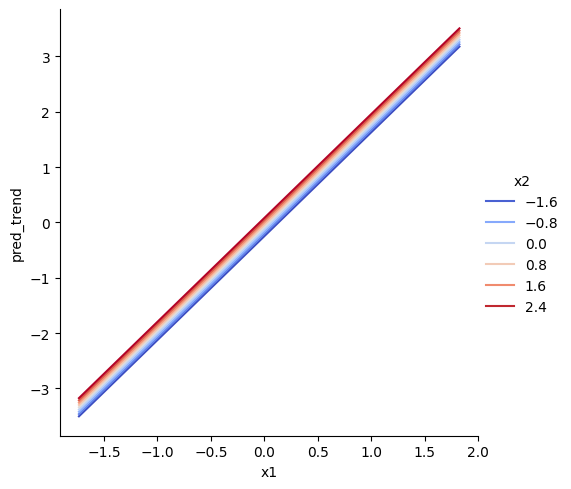

In [55]:
sns.relplot(data = pred_grid_viz, 
            x='x1', y='pred_trend', kind='line',
           hue='x2', palette='coolwarm', # colors to show x1 relationship with each x2
           estimator=None, units='x2') # disable units and estimates defining each line based on x2
plt.show()

The separate line colors shows how the prediction for the trend changes across x1 for different value of x2. We see how the different values for the output increases as x1 increases and the input x2 has minimal impact on the trend as we previously saw. And we can prove that the slope that multiply x2 is larger than the slope tha multiplies x1.

In [56]:
x1x2_fit_add.params # x1 is larger than x2 

Intercept   -0.109888
x1           1.879500
x2           0.075586
dtype: float64

### Why does this matter?
The steps I performed above is to show how to manually interpret what is happening in the prediction of multiple input models. However, it far more easy to sue `statsmodel` function to help with visualizing linear model multiple inputs. Let's see that now...

## Visualizing Multiple Inputs Model with Statsmodels graphics

In [57]:
# Import statsmodel api 
import statsmodels.api as sm

We will use the statsmodel specialize figures to create plots for the prediction and interpret it

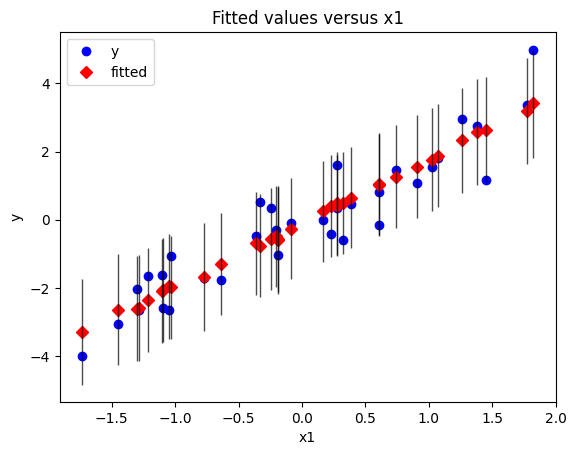

In [58]:
# Create matplotlib figure and axis to use statsmodels plot
fig, ax = plt.subplots()
sm.graphics.plot_fit(x1x2_fit_add, 'x1', ax=ax) # Pass in fitted data and the associated axis
plt.show()

This is saying to plot the fit of the linear model with respect to the selected input, in this case, x1. Note the input must be used in the fitted model formula.
$$\mu = \beta_0 + \beta_1 \times x1 + \beta_2 \times x2 $$
The result shows the fitted or the predictions of the training set. And that is critical when using the statsmodels specialize function. You will also notice that there are gaps shown at several points in the training set. This is because there are no observations at the predicted values around those points. Hence, the reason I created the prediction manually by making 251 continuous evenly spaced values between the x1.min() and x1.max.  

Note that this statsmodels visualization will only show you the predictions at the actual training points. The blue dots indicate the `observed outputs y`,  while the vertical line is the `prediction interval` PI which is the uncertainty of a single measurement. Thus we can see that the sigma is constant giving us an idea of where the predicted observation is located around the average. 

You will also notice the red diamond-shaped dots are not in a straight line whereas the manual prediction visualization was in a straight line. The reason is I assigned only one x2 value to the input. Meaning that you will not see a straight line when you have many inputs. Why we see a somewhat seemingly straight here is because x1 dominates the output-to-input relationship. To verify this let's visualize the training set fit for the x2 input.


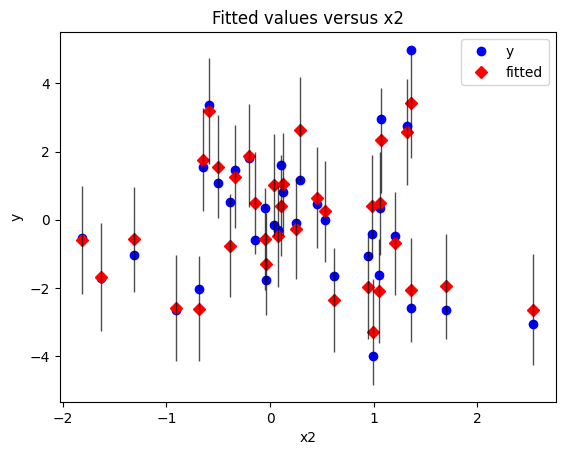

In [59]:
fig, ax = plt.subplots()
sm.graphics.plot_fit(x1x2_fit_add, 'x2', ax=ax) # Pass in fitted data and the associated axis
plt.show()

As we see earlier x2 does not show any reasonable predicted trend, that is because we are not looking at the relationship of x2 for one value of x1. Each one of those dots has a different value of x1 and x2. So we are actually getting the influence of the effect of both x1 and x2 here. We are just seeing what the training set for x2 looks like. However we can examine the trining set predictions and the residuals (errors) and the **partial regression plot in one figure.** 

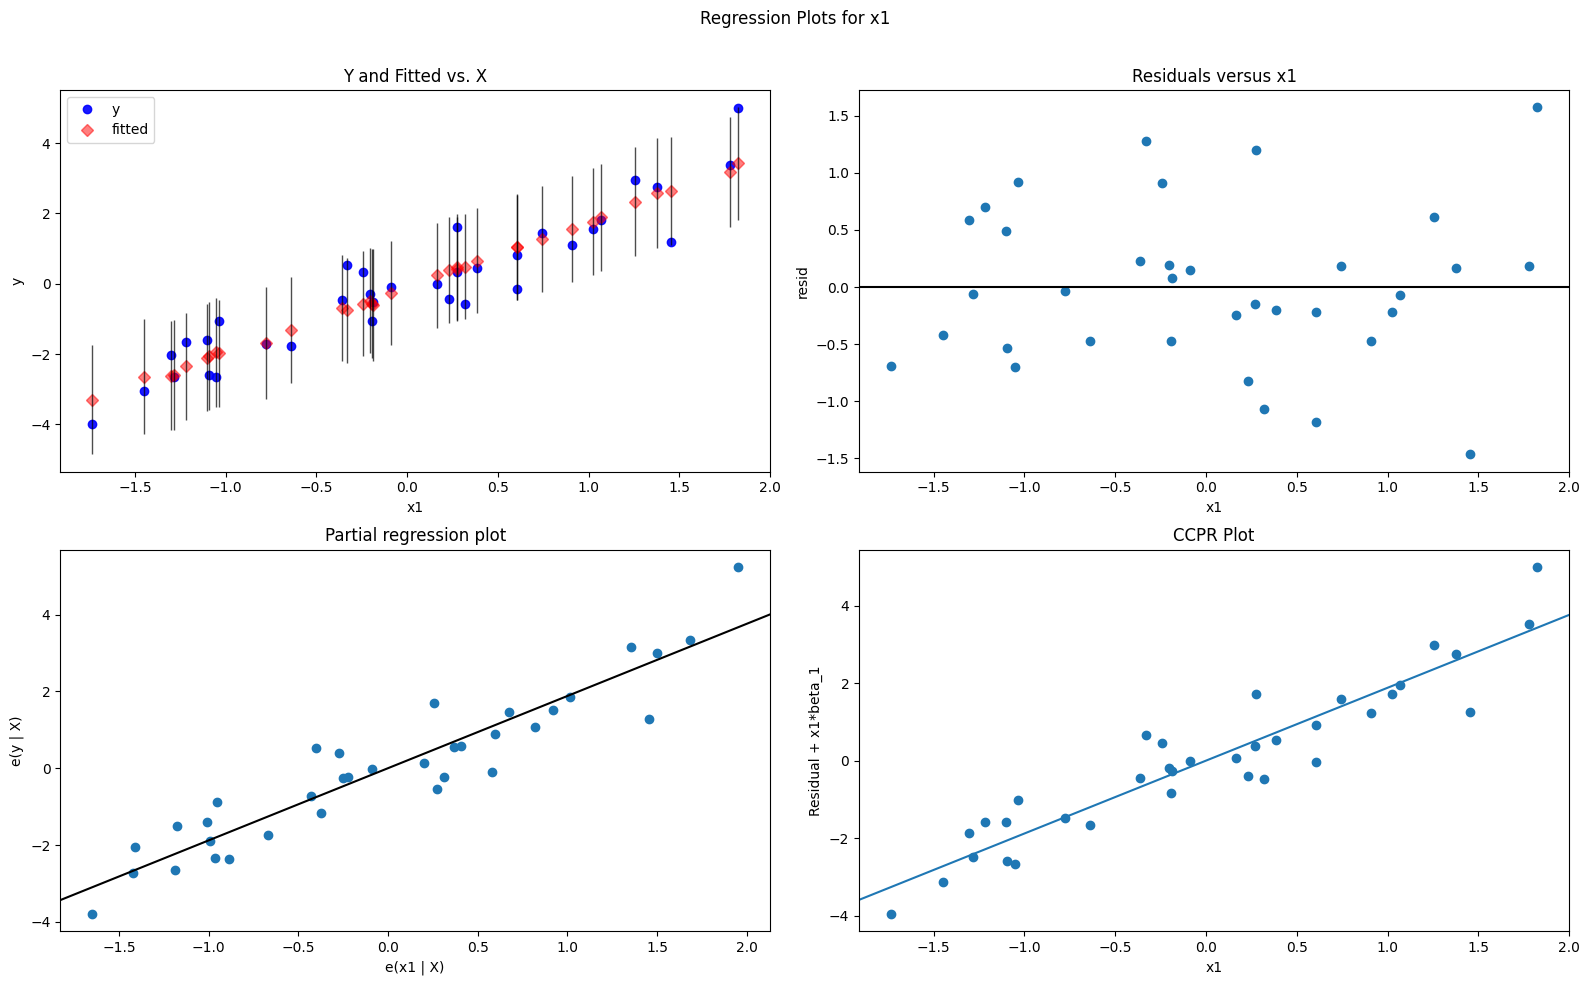

In [60]:
fig = plt.figure(figsize=(16,10))
sm.graphics.plot_regress_exog(x1x2_fit_add, 'x1', fig=fig) # Pass in fitted data to the regression exornogy
plt.show()

This shows us the the output with respect to out input, the residuals (error), the regression plot, and the CCPR plot. Where the partial regression is the trend (avg output) given the value of the one input but accounts for the controls for the second input. Meaning that it is accounting for the fact that x2 is in the model. The CCPR (Component to Component regression plot) also accounts for the component of the second input for the output. And we can also look at x2 to visualize the influence of x1.

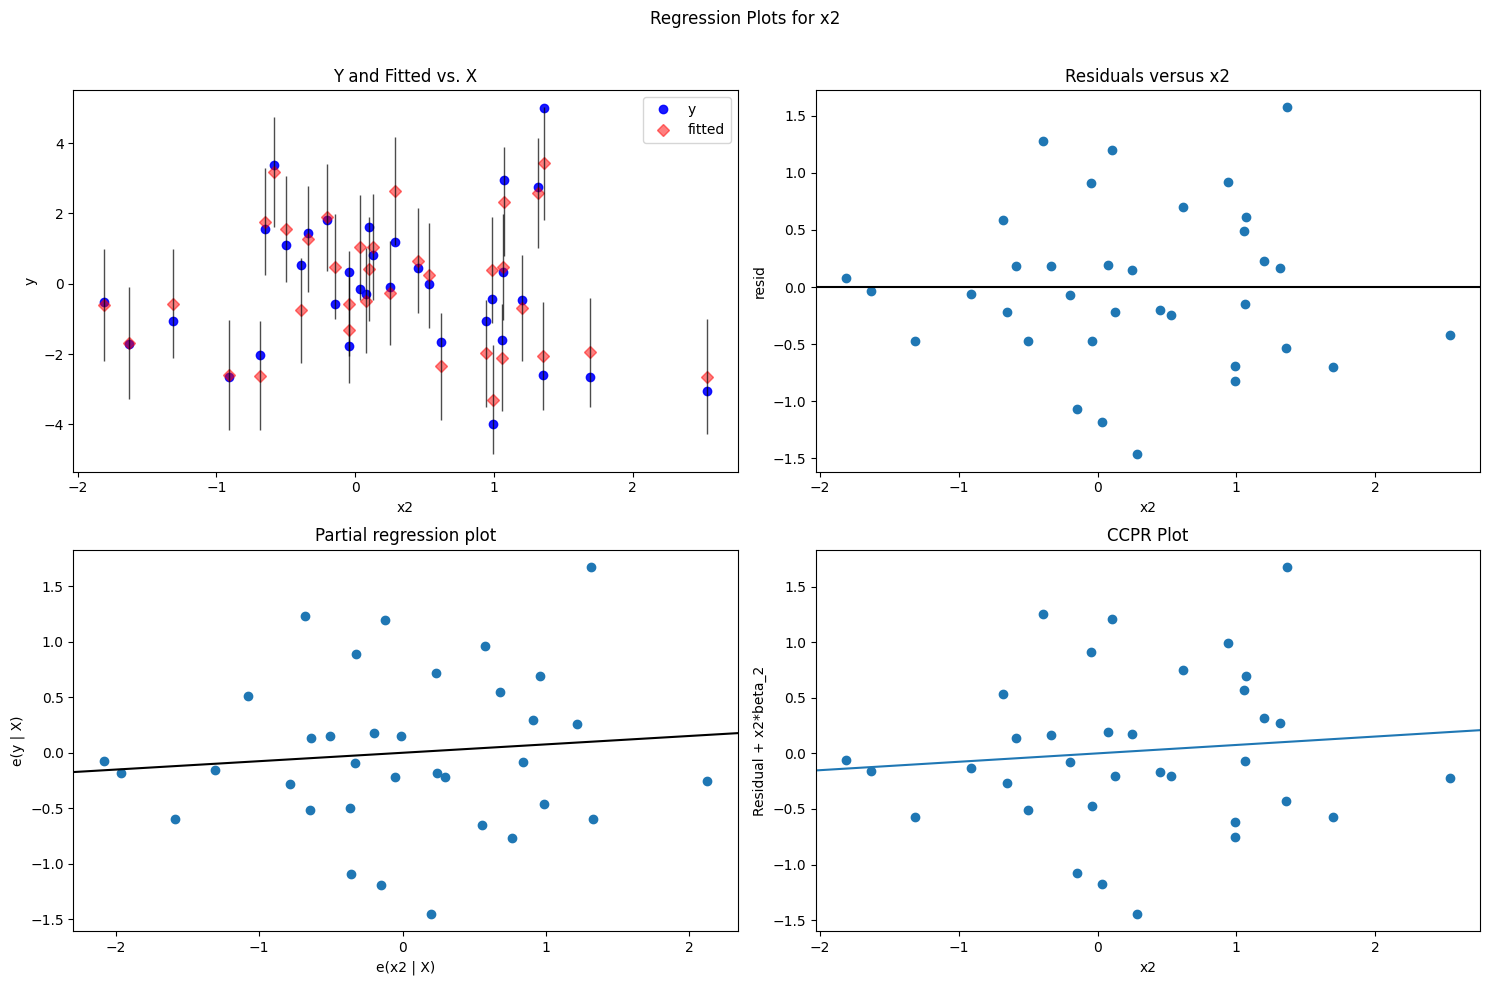

In [61]:
fig = plt.figure(figsize=(15, 10))
sm.graphics.plot_regress_exog(x1x2_fit_add, 'x2', fig=fig)
plt.show()

Notice the partial regression plot shows a positive trend for x2. This highlights the postive slope estimate for x2 when we account for x1. And that is what we had when we generated the data. 

In [62]:
x1x2_fit_add.params

Intercept   -0.109888
x1           1.879500
x2           0.075586
dtype: float64

In [63]:
b2 # x2 two slope

0.2

In [64]:
x1_fit.params

Intercept   -0.090893
x1           1.871110
dtype: float64

In [65]:
x2_fit.params

Intercept   -0.055393
x2          -0.141163
dtype: float64

## In conclusion
The positive regression above is a way to visualize how the trend or average output behaves, with response to 1 input but accounting for all other inputs in your model. So this shows that using lmplot is not intended to visualize your model because it only shows what is happening with one input at a time. While this statsmodels graphics account for the effects of multiple inputs on the most important input of your model. 

For working with multiple continuous inputs you need a model that is allowed to estimate their inputs and or control their effect. Next, let's save randomly generated data for further case studies. 

In [66]:
# save data to csv
df.to_csv('linear_additive_model_example.csv', index=False)